# Nengo SimData Visualization and Analysis

In [17]:
import os
import pickle

import matplotlib
import matplotlib.pyplot as plt
import nengo
import numpy as np
import pandas as pd
import seaborn as sns
from BarGenerator import BarGenerator as BG
from sklearn.decomposition import PCA
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

%matplotlib widget

save2fig = False
plotpath = "../path"
datapath = "../test_data.csv"

matplotlib.rcParams.update({"font.size": 20})
if save2fig:
    matplotlib.rc("xtick", color="white")
    matplotlib.rc("ytick", color="white")
    matplotlib.rc("text", color="white")
else:
    matplotlib.rc("xtick", color="black")
    matplotlib.rc("ytick", color="black")
    matplotlib.rc("text", color="black")

try:
    df = pd.read_csv(datapath)
except _:
    print(f"{datapath} does not exist!")


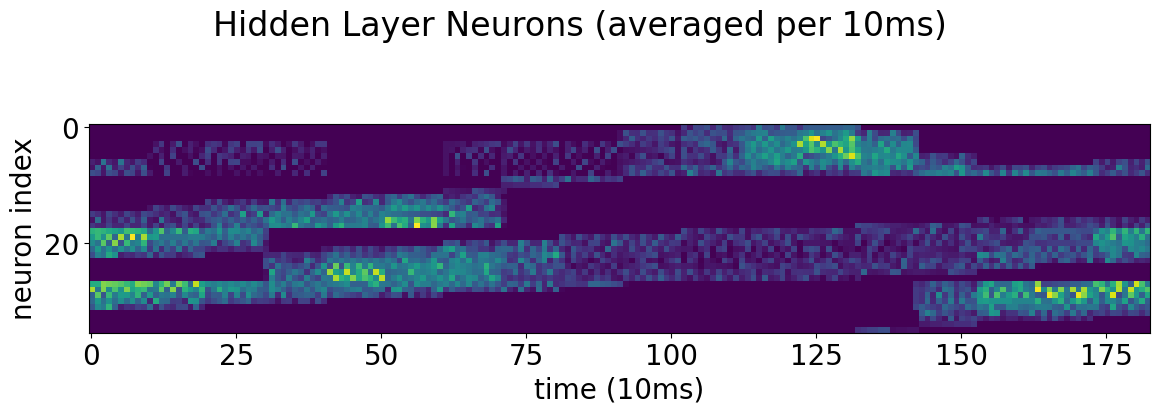

In [50]:
# Plot distribution of the spiking activity every 100 ms
dt = 2e-3
plot_every = int(10e-3 / dt)
mu = []
for i in range(df.shape[0] // plot_every):
    X = df.iloc[i * plot_every : (i + 1) * plot_every].filter(regex="hidden+?")
    mu.append(X.mean(axis=0))

mu = np.asarray(mu).T

fig, axs = plt.subplots(1, 1, figsize=(12, 4))
end = mu.shape[1] // 2
axs.imshow(mu[:, :end])
axs.set_xlabel("time (10ms)")
axs.set_ylabel("neuron index")
plt.suptitle(r"Hidden Layer Neurons (averaged per 10ms)")
plt.tight_layout()

if os.path.isdir(plotpath):
    filepath = os.path.join(plotpath, "hidden_layer.png")
    plt.savefig(filepath, dpi=600, transparent=True)

In [36]:
n_neighbours = 18
clf = KNeighborsClassifier(n_neighbors=n_neighbours, weights="distance")
X = df.filter(regex="hidden+?").values
y = np.argmax(df.filter(regex="^target").values, axis=1)
X_train = X[: int(0.5 * X.shape[0])]
y_train = y[: int(0.5 * X.shape[0])]
X_test = X[int(0.5 * X.shape[0]) :]
y_test = y[int(0.5 * X.shape[0]) :]

pca = PCA(n_components=3)
X_new = pca.fit_transform(X)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

y_train

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4

In [ ]:

cmap = matplotlib.colormaps['viridis'].resampled(n_neighbours)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter3D(*X_new.T, c=y, cmap="tab10", s=10)
plt.show()

# Decoding hidden layer using binary coding

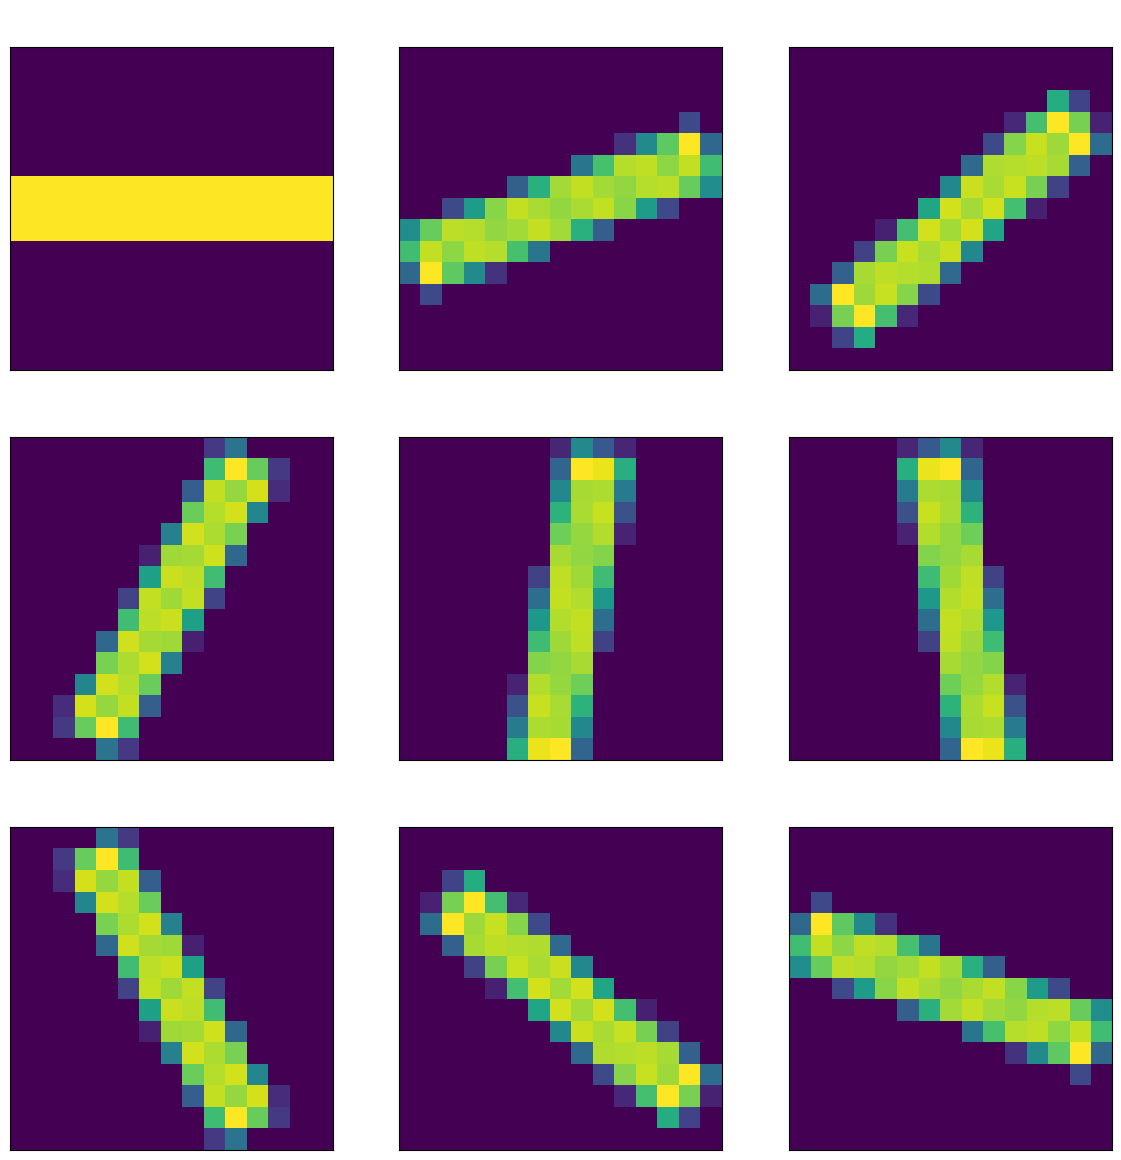

In [12]:
# Plot generated bars
shape = (15, 15)
bg = BG(shape)
num_samples = 9
bars, tags = bg.generate_samples(
    num_samples=num_samples,
    dim=(3, 15),
    shift=(0, 0),
    start_angle=0,
    step=180 / num_samples,
)
nrows, ncols = 3, 3
plt.close("all")
fig, axs = plt.subplots(nrows, ncols, figsize=(12, 12))
for i in range(nrows):
    for j in range(ncols):
        index = i * nrows + j
        axs[i, j].imshow(bars[index])
        axs[i, j].set_title(rf"angle {tags[index]}$^\circ$", color="w")
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])
plt.tight_layout()

if os.path.isdir(plotpath):
    filepath = os.path.join(plotpath, "bars.png")
    plt.savefig(filepath, dpi=600, transparent=True)

In [24]:
try:
    weights = np.load("../weights.npy")
    nrows, ncols = 2, 5
    phi = 180 / (nrows * ncols)
    fig, axs = plt.subplots(nrows, ncols, figsize=(20, 10))
    index = 0
    for i in range(nrows):
        for j in range(ncols):
            axs[i, j].imshow(weights[0, :, :, 0, index].reshape(5, 5))
            axs[i, j].set_title(rf"angle {phi*index}$^\circ$")
            axs[i, j].set_xticks([])
            axs[i, j].set_yticks([])
            index += 1
    plt.tight_layout()

    if os.path.isdir(plotpath):
        filepath = os.path.join(plotpath, "bipolar_gaussian_rf.png")
        plt.savefig(filepath, dpi=600, transparent=True)
except FileNotFoundError as e:
    print(e)

[Errno 2] No such file or directory: '../weights.npy'


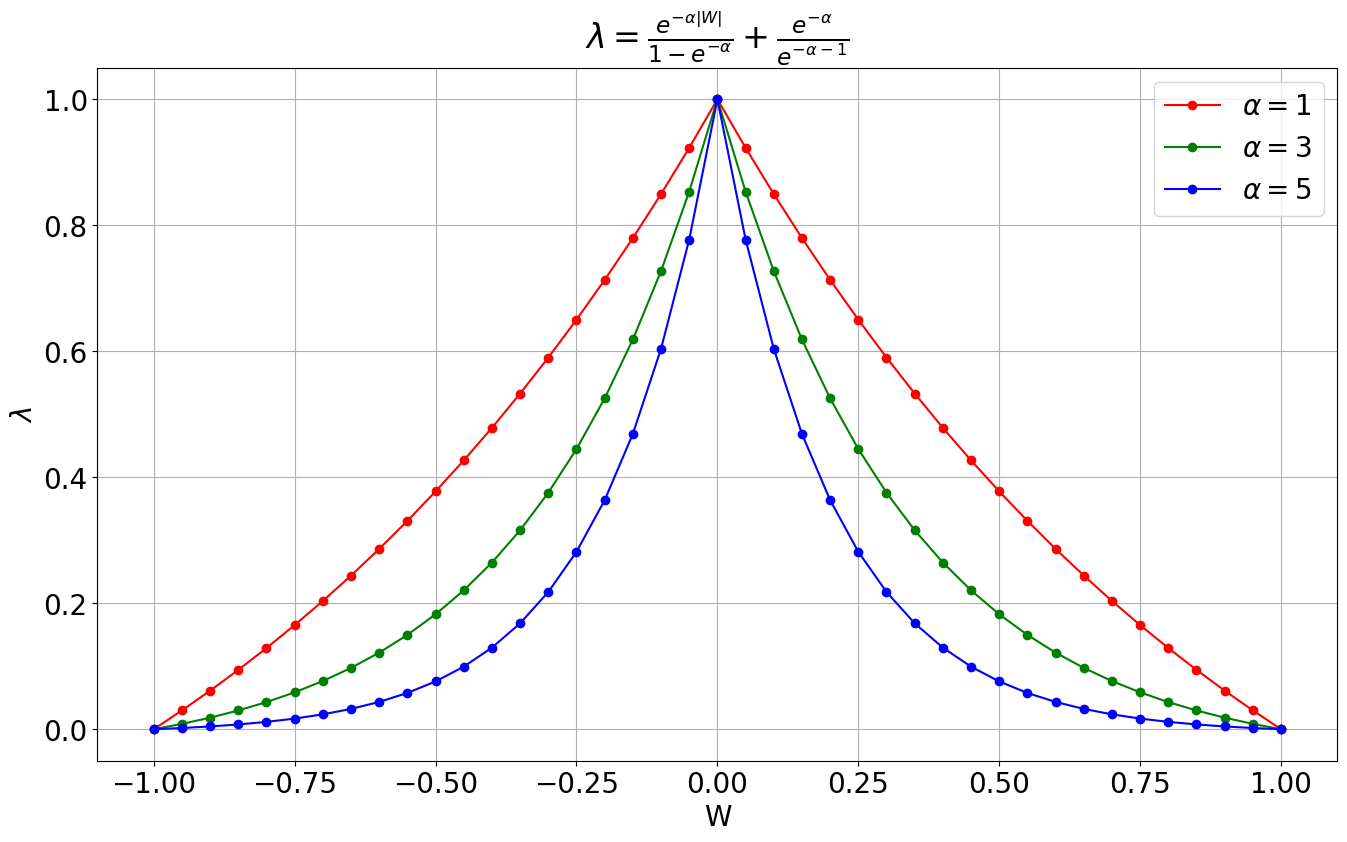

In [13]:
plt.figure(figsize=(16, 9))
alphas = [1, 3, 5]
colors = ["r", "g", "b"]
for i in range(3):
    alpha = alphas[i]
    beta = np.exp(-alpha)
    a = 1 / (1 - beta)
    b = beta / (beta - 1)
    x = np.linspace(-1, 1, 41)
    y = a * np.exp(-alpha * np.abs(x)) + b
    plt.plot(x, y, f"{colors[i]}o-", label=rf"$\alpha={alpha}$")
plt.ylabel(r"$\lambda$")
plt.xlabel("W")
plt.title(
    r"$\lambda = \frac{e^{-\alpha |W|}}{1 - e^{-\alpha}} + \frac{e^{-\alpha}}{e^{-\alpha - 1}}$"
)
plt.grid()
plt.legend()
plt.show()